### What does this code do

I configured the ImageDataGenerator that will be used for training, showed the result of it in the images that will be inserted in the report

- Resizing: I set target_size=(150, 150). This squishes your 300x200 rectangles into 150x150 squares.

- Normalization: I set rescale=1./255. This converts the pixel math from [0, 255] to [0, 1].

- Augmentation: To prevent overfitting, I created a complex augmentation pipeline (Rotation, Zoom, Shear, Flip) and visualized it.

Here is the short summary explaining what each augmentation parameter are allowed to do to the image:

- rescale=1./255: Normalization. Divides every pixel value by 255 to shrink numbers from 0-255 down to 0-1 (Neural networks learn faster with small decimals).

- rotation_range=40: Spin. randomly rotates the image left or right up to 40 degrees.

- width/height_shift_range=0.2: Slide. Randomly moves the image off-center (left, right, up, or down) by up to 20%.

- shear_range=0.2: Distort. Tugs one corner of the image to skew the perspective (turns a square into a parallelogram).

- zoom_range=0.2: Scale. Randomly zooms the camera in or out by 20%.

- horizontal_flip=True: Mirror. Flips the image left-to-right (useful because a left hand looks like a mirrored right hand).

- fill_mode='nearest': Patch. Fills any empty pixels created by rotation/movement with the color of the nearest valid pixel (creates those "streaks" at the edges).

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
import matplotlib.pyplot as plt
import numpy as np

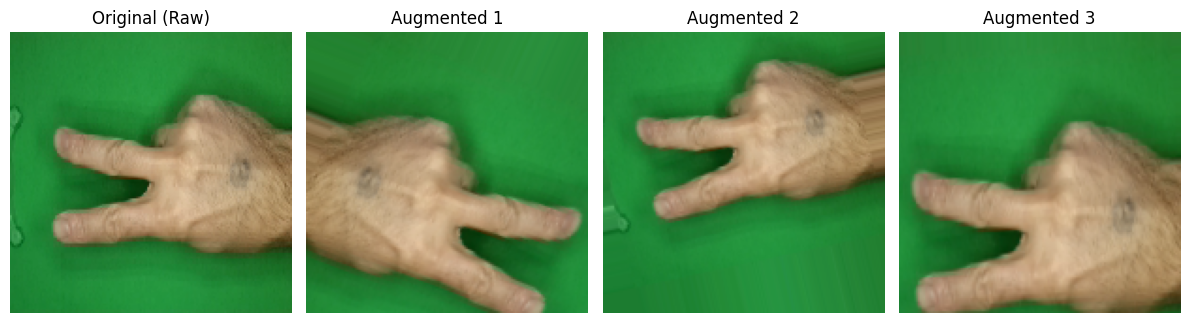

In [ ]:
# 1. SETUP PATHS
base_dir = os.path.abspath('/Users/paolominini/Local_Data/rockpaperscissor/processed')
train_dir = os.path.join(base_dir, 'train')

# Define where to save the report figure
report_fig_dir = os.path.abspath('../reports/figures')
os.makedirs(report_fig_dir, exist_ok=True) # Create folder if it doesn't exist

# 2. DEFINE THE PIPELINE (This is what we will use for training later)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,      # Rotate up to 40 degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 3. SELECT A SAMPLE IMAGE (For the "Before" picture)
# We pick the first image we find in the 'rock' folder
sample_class = 'scissors'
sample_folder = os.path.join(train_dir, sample_class)
sample_image_name = os.listdir(sample_folder)[0] # Grab first file
sample_image_path = os.path.join(sample_folder, sample_image_name)

# Load and convert to array
original_img = load_img(sample_image_path, target_size=(150, 150)) 
x = img_to_array(original_img)
x = x.reshape((1,) + x.shape) # Reshape to (1, 150, 150, 3) for the generator since this is the size we will use in the CNNs

# 4. GENERATE AUGMENTATIONS (The "After" pictures)
# This loop asks the generator to create variations of ONLY this image
i = 0
augmented_images = []
for batch in train_datagen.flow(x, batch_size=1):
    augmented_images.append(batch[0])
    i += 1
    if i >= 3: # We only want 3 examples
        break

# 5. PLOT AND SAVE
plt.figure(figsize=(12, 4))

# Plot Original
plt.subplot(1, 4, 1)
plt.imshow(original_img)
plt.title("Original (Raw)")
plt.axis('off')

# Plot 3 Augmented Versions
for idx, img in enumerate(augmented_images):
    plt.subplot(1, 4, idx + 2)
    plt.imshow(img)
    plt.title(f"Augmented {idx+1}")
    plt.axis('off')

plt.tight_layout()

# SAVE TO REPORTS FOLDER
save_path = os.path.join(report_fig_dir, 'augmentation_example.png')
# plt.savefig(save_path, dpi=300)

# print(f"SUCCESS! Figure saved to: {save_path}")
# plt.show()